# Unit #3 Code: Regression Inference, Prediction, and Explanation

In this code, we will implement and apply inference concepts that we learned about in Unit #3.

Name: Adam Ten Hoeve

## Problem #1

Let's take a look at the some [weather data](https://www.kaggle.com/budincsevity/szeged-weather/home). Our goal will be to think about prediction and explanation with respect to this data. But, this is a (somewhat) large dataset, and along the way, I'll ask you to clean and subset the data (these are important skills for data scientists).

Here's a call to load the data:

In [1]:
weather = read.csv("https://www.colorado.edu/amath/sites/default/files/attached-files/weatherhistory.txt", sep = "\t")

#### (a) Print out the column names for this dataset. Our goal is to see how humidity does in predicting apparent temperature, while adjusting for some other variables. Construct a new dataframe with the date, temperature, apparent temperature, humidity, and windspeed. Also, since the names are a bit ugly, change them to:

"date", "temp", "atemp", "humid", "wspeed"

In [2]:
colnames(weather)

[1] "Formatted.Date"           "Summary"                 
 [3] "Precip.Type"              "Temperature..C."         
 [5] "Apparent.Temperature..C." "Humidity"                
 [7] "Wind.Speed..km.h."        "Wind.Bearing..degrees."  
 [9] "Visibility..km."          "Loud.Cover"              
[11] "Pressure..millibars."     "Daily.Summary"

In [3]:
library(tidyverse)
weather2 = select(weather, Formatted.Date, Temperature..C., Apparent.Temperature..C., Humidity, Wind.Speed..km.h.)
colnames(weather2) = c("date", "temp", "atemp", "humid", "wspeed")
head(weather2)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


date,temp,atemp,humid,wspeed
2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,14.1197
2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,14.2646
2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,3.9284
2006-04-01 03:00:00.000 +0200,8.288889,5.944444,0.83,14.1036
2006-04-01 04:00:00.000 +0200,8.755556,6.977778,0.83,11.0446
2006-04-01 05:00:00.000 +0200,9.222222,7.111111,0.85,13.9587


#### (b) Split the data into a training and testing set (as in previous assignments). Fit a linear model where atemp is the response and humid wspeed are predictors. Print the lm() summary.

In [4]:
# Set the seed for random numbers
set.seed(99)
# Sample size is 80% of the number of rows
sampleSize = floor(0.8 * nrow(weather2))
# Get random row indexes from the data set
randIndexes = sample(seq_len(nrow(weather2)), size = sampleSize)
# Create training set from rows with the random indexes. Make test set everything else.
training = weather2[randIndexes, ]
test = weather2[-randIndexes, ]

In [18]:
# Fit a MLR model to training data
lmod = lm(atemp ~ humid + wspeed, data = training)
summary(lmod)


Call:
lm(formula = atemp ~ humid + wspeed, data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.440  -5.639   0.641   6.272  22.400 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  40.344304   0.137448  293.52   <2e-16 ***
humid       -35.541539   0.156623 -226.92   <2e-16 ***
wspeed       -0.313168   0.004424  -70.79   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.28 on 77159 degrees of freedom
Multiple R-squared:  0.4022,	Adjusted R-squared:  0.4022 
F-statistic: 2.596e+04 on 2 and 77159 DF,  p-value: < 2.2e-16


#### (c) Compute the standard error, t-value, and p-value explicitly and make sure that they match the summary above.

In [6]:
modelsummary = summary(lmod)
betaHumidHat = modelsummary$coefficients["humid", "Estimate"]
betaWSpeedHat = modelsummary$coefficients["wspeed", "Estimate"]
betaInterHat = modelsummary$coefficients["(Intercept)", "Estimate"]

In [7]:
# calculate the estimate of variance. sigmaHat^2 = sum(y_i - ybar)^2 / [n - (p+1)]
sigmaHat = sum((resid(lmod))^2) / (nrow(training) - 3)
# calulate standard error for intercept. s.e(B_j) = sqrt(var(B_j)) = sqrt(sigmaHat^2 * [(X^T*X)^-1]_jj)
X = matrix(c(rep(1, times = nrow(training)), training$humid, training$wspeed), ncol = 3, nrow = nrow(training))
seInter = sqrt(sigmaHat * (solve(t(X) %*% X)[1,1]))
cat("standard error:", seInter, "\n")
# calculate the t-value for intercept. t = (bHat_j - b_j) / seHumid
tInter = betaInterHat / seInter
cat("t-value:", tInter, "\n")
# calculate the p-vaue for intercept.
pInter = 2 * pt(-abs(tInter), df = nrow(training) - ncol(training))
cat("p-value:", pInter, "\n")

standard error: 0.1374476 
t-value: 293.5251 
p-value: 0 


In [8]:
# Repeat above with humidity.
# Calculate standard error
seHumid = sqrt(sigmaHat * (solve(t(X) %*% X)[2,2]))
cat("standard error:", seHumid, "\n")
# calculate the t-value for humidity. t = (bHat_j - b_j) / seHumid
tHumid = betaHumidHat / seHumid
cat("t-value:", tHumid, "\n")
# calculate the p-vaue for humidity
pHumid = 2 * pt(-abs(tHumid), df = nrow(training) - ncol(training))
cat("t-value:", pHumid, "\n")

standard error: 0.156623 
t-value: -226.9241 
t-value: 0 


In [9]:
# Repeat above with wspeed
seWSpeed = sqrt(sigmaHat * solve(t(X) %*% X)[3,3])
cat("standard error:", seWSpeed, "\n")
# calc t-val
tWSpeed = betaWSpeedHat / seWSpeed
cat("t-value:", tWSpeed, "\n")
# calc p-val
pWSpeed = 2 * pt(-abs(tWSpeed), df = nrow(training - ncol(training)))
cat("t-value:", pWSpeed, "\n")

standard error: 0.004424065 
t-value: -70.7873 


Warning message in Ops.factor(left, right):
"'-' not meaningful for factors"

t-value: 0 


From the calculations above we see that the all of our personal calculations are the same as the calculations from the summary.

#### (d) Construct 90% confidence intervals for each MLR parameter.

In [19]:
confint(lmod, level = 0.9)

,5 %,95 %
(Intercept),40.1182200,40.5703877
humid,-35.7991645,-35.2839145
wspeed,-0.3204447,-0.3058906


#### (e) Conduct an F-test to compare the full model above with the SLR model containing only humidity. What other test is this F-test equivalent to?

In [11]:
anova(lm(atemp ~ humid, data = training), lm(atemp ~ humid + wspeed, data = training))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
77160,5633309,NA,NA,NA,NA
77159,5289781,1,343527.8,5010.842,0


Because the p-value of the anova test is very small, we reject the null hypothesis and assert that the SLR model is not sufficient to model the data, therefore we should use the MLR model. Notice that the F-test is equivalent to an anova test, which tests whether the means of the two (or more, if applicable) models are the same.

#### (f) Randomly choose five values from the training set, and use those humidity and windspeed values to predict apparent temperature. Be sure to provide and interpret prediction intervals. 

In [12]:
set.seed(99)
randIndexes = sample(x = seq_len(nrow(training)), size = 5)
randSamples = training[randIndexes, ]
predict(lmod, newdata = randSamples, interval = "prediction")

,fit,lwr,upr
78635,16.457862,0.2290944,32.68663
3925,27.128206,10.8988718,43.35754
17743,5.052116,-11.1767361,21.28097
84472,8.721142,-7.5085055,24.95079
95101,14.532365,-1.6964092,30.76114


The prediction intervals mean that 95% of the time, the actual y-value will fall within the predicted interval. In this case, the range of intervals is $\sim 30$.

#### (g) Compute the predicted MSE for all values in the training set using both the MLR and SLR models above. Which performs better?

In [13]:
# Get the predicted values for both SLR and MLR for all values in the training set
predsSLR = predict(lm(atemp ~ humid, data = training), newdata = training)
predsMLR = predict(lmod, newdata = training)
# Calculte the MSE for both sets of predicitions
MSESLR = mean((training[,3] - predsSLR)^2)
MSESLR
MSEMLR = mean((training[,3] - predsMLR)^2)
MSEMLR

[1] 73.00626

[1] 68.55423

The MSE for the SLR model is 73.006 and the MSE for the MLR model is 68.554. This means that our MLR model does perform better (in terms of smaller residuals) than the SLR model and is a better fit for the variance in the data.

#### (h) Describe some difficulties in using the MLR model for explanation for this dataset. Can we infer causality (e.g., that changes in windspeed and humidity cause changes in apparent temperature)? If so, why? If not, what might we need to do to infer causality?

One difficulty with the model is that it doesn't take into account all of the possible predictors that affect the apparent temperature. I.e. there are more than just windspeed and humidity that affects the apparent temperature. Another issue is that this is an observational study, meaning that the data is occuring and nothing is being controlled for. It's usually easier to infer causality from experiments where variables can be more controlled.

## Problem #2

The PlantGrowth data contains results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions. 

#### (a) Load the data into R and construct a boxplot of weight for each group (the control, treatment 1, and treatment 2). What do you notice about the distribution of weight across these three groups?

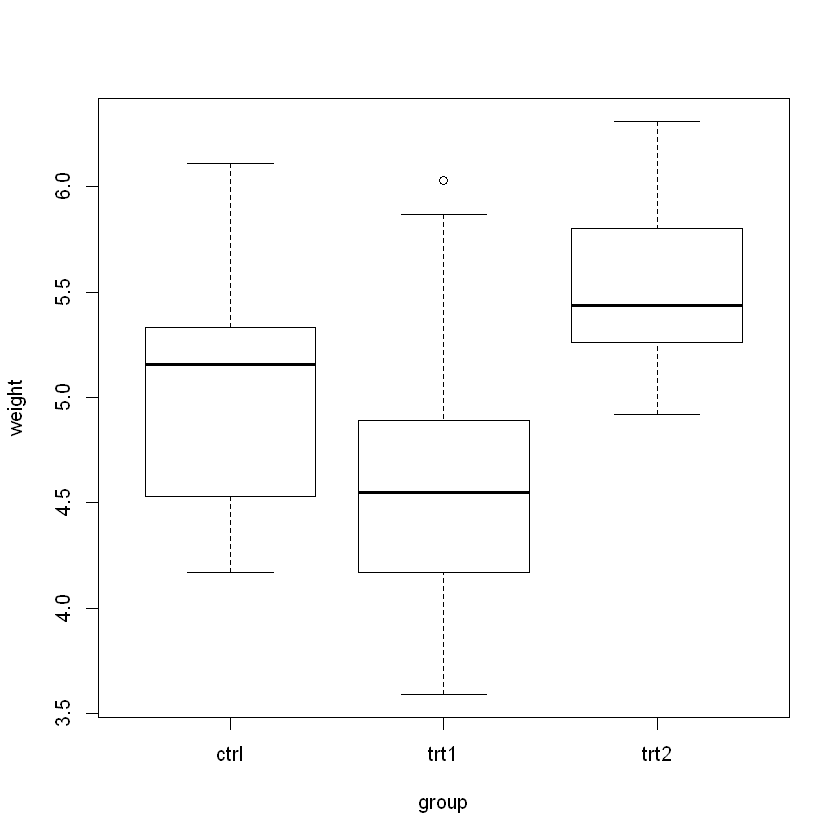

In [14]:
data(PlantGrowth)
plot(weight ~ group, data = PlantGrowth)

From the plot, we can tell that the first treatment, on average, created plants that weighed less than the control but had a wider range of resulting weights. The second treatment, on average, produced plants that weighed more than the average with a smaller range of resulting weights. 

#### (b) Perform a regression that uses weight as the response and group as the predictor. Print the summary. Notice that the result is actually *multiple* linear regression, not simple linear regression. The model being used here is:

\begin{align*}
Y_i = \beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i,2} + \varepsilon_i
\end{align*}

where 

1. $X_{i,1} = 1$ if the $i^{th}$ plant is in the first treatment group and zero otherwise.
2.  $X_{i,2} = 1$ if the $i^{th}$ plant is in the second treatment group and zero otherwise.

Notice that, if $X_{i,1} = 1$ and $X_{i,2} = 1$ are both zero, then the $i^{th}$ plant is in the control group.

#### Print out the design matrix to confirm that this is the model being used.

In [15]:
lmod = lm(weight ~ group, data = PlantGrowth)
summary(lmod)
# model.matrix(~group, data = PlantGrowth)
model.matrix(lmod)


Call:
lm(formula = weight ~ group, data = PlantGrowth)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0710 -0.4180 -0.0060  0.2627  1.3690 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.0320     0.1971  25.527   <2e-16 ***
grouptrt1    -0.3710     0.2788  -1.331   0.1944    
grouptrt2     0.4940     0.2788   1.772   0.0877 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6234 on 27 degrees of freedom
Multiple R-squared:  0.2641,	Adjusted R-squared:  0.2096 
F-statistic: 4.846 on 2 and 27 DF,  p-value: 0.01591


,(Intercept),grouptrt1,grouptrt2
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0
10,1,0,0


#### (c) There are three groups in this study. Why are there only two predictors in the model? To investigate this, consider fitting a new model: 

\begin{align*}
Y_i = \beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i,2} + \beta_2 X_{i,3} + \varepsilon_i
\end{align*}

where 

1. $X_{i,1} = 1$ if the $i^{th}$ plant is in the first treatment group and zero otherwise.
2. $X_{i,2} = 1$ if the $i^{th}$ plant is in the second treatment group and zero otherwise.
3. $X_{i,3} = 1$ if the $i^{th}$ plant is in the control group and zero otherwise.

#### What would happen when you fit this model? (Hint: Something is wrong with the design matrix!)


In [16]:
badLmod = lm(weight ~ -1 + group, data = PlantGrowth)
summary(badLmod)
model.matrix(badLmod)


Call:
lm(formula = weight ~ -1 + group, data = PlantGrowth)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0710 -0.4180 -0.0060  0.2627  1.3690 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
groupctrl   5.0320     0.1971   25.53   <2e-16 ***
grouptrt1   4.6610     0.1971   23.64   <2e-16 ***
grouptrt2   5.5260     0.1971   28.03   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6234 on 27 degrees of freedom
Multiple R-squared:  0.9867,	Adjusted R-squared:  0.9852 
F-statistic: 665.5 on 3 and 27 DF,  p-value: < 2.2e-16


,groupctrl,grouptrt1,grouptrt2
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0
10,1,0,0


When we fit this model, there is no intercept in the model, instead the 5.032 of the intercept in the first model is the estimate of the control predictor in the second. Because we are treating the control as a new variable rather than the baseline, the the model has no possible interpretation for when the treatments are 0 which is where the intercept would lie. It's also worth noting that each estimate has increased by 5.032 from the first model. This is because the first (control) column is now dependent on the other two columns, meaning $X^TX$ is no longer invertible and has infinite solutions, so is nonidentifiable.

#### (d) Interpret the coefficients in the model above. In particular:

1. what is the mean yield of the control group?
2. what is the mean yield of the treatment 1 group?
3. What is the difference in the mean between the control group and and the second treatment group?

1. The mean yield of the control group is 5.0320, the same as the intercept from the first model.
2. The mean yield of the treatment 1 group is 4.661, 5.032 greater than the first model.
3. The difference between the means yields of the control group and second treatment group is 5.526 - 5.032 = 0.494, which is the coefficient of the second treatment in the first model.

#### (e) Is there reason to believe that there is *some* difference in means between the control group and a treatment group?

Yes. Because the p-value of the F-statistic for our first model is 0.015 < 0.05, we can reject the null hypothesis and say that there is a statistically significant difference between the means of the groups. We don't know which groups, but we know that there is a pair that have different means.

#### (f) The R help file claims that this is an experiment. What are some facts that we should consider about the design of the experiment before we might feel comfortable making causal claims about the treatments (e.g., that on average treatment 1 caused an increase in yield of $u$ units over the control)?

To make causal claims, we should be confident that we controlled for all othe variables. If there were other features that affected the result of the experiment, then we can not definitively say that there is causation. Other things that we must consider are also the randomization of the other variables and the random noise in the measurements.